In [15]:
#Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [378]:
pd.set_option('display.float_format', '{:.1f}'.format)
#Para que los valores numéricos con coma me los redondee con 1 cifra decimal.

In [17]:
#Creamos el dataframe a partir del archivo csv
df = pd.read_csv('car insurance.csv')

### 1) Inspección primaria del dataset

#### Metadata: 
• cust_age: Edad del cliente

• policy_id: ID de la póliza de seguro

• coverage_start_date: Fecha de inicio de la cobertura de seguro

• cust_region: Región del cliente

• sum_assured_group: Grupo de suma asegurada (baja, media o alta)

• ins_deductible: Deducible del seguro

• annual_prem: Prima anual del seguro

• zip_code: Código postal del cliente

• insured_sex: Sexo del cliente

• edu_lvl: Nivel eduactivo

• marital_status: Estado civil

• claim_incurred_date: Fecha del siniestro

• claim_type: Tipo de incidente

• acc_type: Tipo de accidente (si aplica)

• emg_services_notified: Servicios de emergencia notificados sobre el incidente

• incident_city: Ciudad del incidente

• incident_hour: Hora del incidente

• num_vehicles_involved: Número de vehículos involucrados

• property_damage: Indica si hubo daños a la propiedad (además de daños al vehículo)

• bodily_injuries: Número de personas afectadas por lesiones corporales

• witnesses: Número de testigos del incidente

• police_report_avlbl: Indica si existe un reporte policial

• total_claim_amount: Monto total del reclamo

• injury_claim: Monto del reclamo por lesiones corporales

• property_claim: Monto del reclamo por daños a la propiedad

• vehicle_claim: Monto del reclamo por daños al vehículo

• car_brand: Marca del vehículo

• car_model: Modelo del vehículo

• production_year: Año de producción del vehículo

In [32]:
df.shape
#Nuestro dataframe está compuesto por 1000 filas y 29 columnas.

(1000, 29)

In [21]:
df.info()
#Tenemos todas las variables con formatos adecuados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_age               1000 non-null   int64  
 1   policy_id              1000 non-null   int64  
 2   coverage_start_date    1000 non-null   object 
 3   cust_region            1000 non-null   object 
 4   sum_assured_group      1000 non-null   object 
 5   ins_deductible         1000 non-null   int64  
 6   annual_prem            1000 non-null   float64
 7   zip_code               1000 non-null   int64  
 8   insured_sex            1000 non-null   object 
 9   edu_lvl                1000 non-null   object 
 10  marital_status         1000 non-null   object 
 11  claim_incurred_date    1000 non-null   object 
 12  claim_type             1000 non-null   object 
 13  acc_type               822 non-null    object 
 14  emg_services_notified  909 non-null    object 
 15  incid

In [380]:
df.describe()
#No observo ninguna anomalía en los datos en cuanto a máximos, mínimos o medias.

,cust_age,policy_id,ins_deductible,annual_prem,zip_code,incident_hour,num_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,production_year
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,38.9,329025.0,1136.0,1254.5,401182.5,11.6,1.8,1.0,1.5,52944.2,7457.5,7430.0,38056.7,2012.1
std,9.1,154237.8,611.9,244.2,71701.6,7.0,1.0,0.8,1.1,26880.8,4931.3,4908.1,19210.6,6.0
min,19.0,61764.0,500.0,431.4,330072.0,0.0,1.0,0.0,0.0,100.0,0.0,0.0,70.0,2002.0
25%,32.0,202870.0,500.0,1087.7,348372.5,6.0,1.0,0.0,1.0,41812.5,4295.0,4445.0,30292.5,2007.0
50%,38.0,321160.0,1000.0,1255.3,366413.5,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,2012.0
75%,44.0,456741.8,2000.0,1413.8,503219.0,17.0,3.0,2.0,2.0,70592.5,11330.0,10885.0,50822.5,2017.0
max,64.0,600943.0,2000.0,2045.7,520930.0,23.0,4.0,2.0,3.0,151632.0,24726.0,28054.0,106960.0,2022.0


In [25]:
df.head()
#Observamos las primeras 5 filas de nuestro dataframe

,cust_age,policy_id,coverage_start_date,cust_region,sum_assured_group,ins_deductible,annual_prem,zip_code,insured_sex,edu_lvl,...,bodily_injuries,witnesses,police_report_avlbl,total_claim_amount,injury_claim,property_claim,vehicle_claim,car_brand,car_model,production_year
0,44,225016,08.09.2007,north,mid,2000,1007.48,342178,F,college,...,0,2,YES,74140,13480,13480,47180,BMW,X5,2022
1,56,316183,02.02.2016,north,mid,500,1080.60,506682,F,phd,...,2,3,NaN,56430,0,6270,50160,Honda,CRV,2021
2,28,174430,04.02.2020,east,mid,2000,1078.03,330854,M,high school,...,0,1,YES,53600,6700,6700,40200,Volkswagen,Jetta,2014
3,53,67527,27.01.2013,north,low,1000,1026.55,502272,F,college,...,0,0,NO,80960,14720,7360,58880,Accura,MDX,2007
4,47,259758,08.04.2015,east,mid,2000,1484.15,515656,F,associate,...,2,3,NaN,64100,12820,6410,44870,Dodge,RAM,2021


In [110]:
#Valores únicos por columna
df.nunique().sort_values(ascending=False)

policy_id                1000
zip_code                  995
annual_prem               991
coverage_start_date       952
total_claim_amount        763
vehicle_claim             726
injury_claim              638
property_claim            627
claim_incurred_date        60
cust_age                   46
car_model                  39
incident_hour              24
production_year            21
car_brand                  14
incident_city               7
edu_lvl                     7
claim_type                  4
num_vehicles_involved       4
witnesses                   4
emg_services_notified       4
acc_type                    3
marital_status              3
property_damage             3
bodily_injuries             3
ins_deductible              3
sum_assured_group           3
cust_region                 3
police_report_avlbl         2
insured_sex                 2
dtype: int64

In [112]:
#Valores faltantes
df.isnull().sum().sort_values(ascending=False)
#Vemos que tenemos missing values en acc_type, emg_services_notified y police_report_avlbl. 
#Que hayan missing en acc_type no deberia ser un problema porque la metadata misma nos dice que las observaciones de esta variable se computan si aplican. 
#En cuanto a emg_services_notified, que tengamos un NaN aqui puede ser mas problemático porque se puede tratar de negligencia a la hora de ingresar los datos. Al ser una variable categórica, podemos imputar los valores faltantes por su moda (su observación más frecuente), en este caso es "Police".
#Por último la variable police_report_avlbl, podemos tratarla igual que emg_services_notified al ser también una variable categórica y por lo tanto sustiuir sus valores faltates por su moda, es decir, "No".

police_report_avlbl      343
acc_type                 178
emg_services_notified     91
incident_city              0
car_model                  0
car_brand                  0
vehicle_claim              0
property_claim             0
injury_claim               0
total_claim_amount         0
witnesses                  0
bodily_injuries            0
property_damage            0
num_vehicles_involved      0
incident_hour              0
cust_age                   0
policy_id                  0
claim_type                 0
claim_incurred_date        0
marital_status             0
edu_lvl                    0
insured_sex                0
zip_code                   0
annual_prem                0
ins_deductible             0
sum_assured_group          0
cust_region                0
coverage_start_date        0
production_year            0
dtype: int64

In [71]:
df.emg_services_notified.describe()

count        909
unique         4
top       Police
freq         292
Name: emg_services_notified, dtype: object

In [38]:
df.acc_type.describe()

count                822
unique                 3
top       rear collision
freq                 292
Name: acc_type, dtype: object

In [135]:
df.acc_type.value_counts()
#Tenemos 292 colisiones traseras, 276 laterales y 254 frontales. El resto de las 178 observaciones son NaN.

acc_type
rear collision     292
side collision     276
front collision    254
Name: count, dtype: int64

In [137]:
df.claim_type.value_counts()
#La suma de multi-vehicle collision y single vehicle collision son los 822 que tenemos como observaciones en acc_type. 
#Por lo que está bien dejar en NaN el resto de las observaciones (que son 178) ya que no representan accidentes (colisiones). 

claim_type
multi-vehicle collision     419
single vehicle collision    403
theft                        94
parked car                   84
Name: count, dtype: int64

In [117]:
df.police_report_avlbl.describe()

count     657
unique      2
top        NO
freq      343
Name: police_report_avlbl, dtype: object

In [169]:
# Porcentaje de valores faltantes por variable
total_faltantes=df.isnull().sum()
num_filas=df.shape[0]
porcen_faltantes=(total_faltantes/num_filas*100).sort_values(ascending=False)
print(porcen_faltantes)

acc_type                 17.8
cust_age                  0.0
incident_city             0.0
car_model                 0.0
car_brand                 0.0
vehicle_claim             0.0
property_claim            0.0
injury_claim              0.0
total_claim_amount        0.0
police_report_avlbl       0.0
witnesses                 0.0
bodily_injuries           0.0
property_damage           0.0
num_vehicles_involved     0.0
incident_hour             0.0
emg_services_notified     0.0
policy_id                 0.0
claim_type                0.0
claim_incurred_date       0.0
marital_status            0.0
edu_lvl                   0.0
insured_sex               0.0
zip_code                  0.0
annual_prem               0.0
ins_deductible            0.0
sum_assured_group         0.0
cust_region               0.0
coverage_start_date       0.0
production_year           0.0
dtype: float64


Observación adicional: La variable property_damage tiene 360 observaciones con el signo de pregunta (?). Esto no es un dato faltante per se, pero igual es importante remarcarlo porque tenemos 360 observaciones en esta variable que no estan calificadas ni como Si ni como No. Es decir, en estas 360 observaciones no podemos afirmar si hubo o no daño a la propiedad de terceros en el siniestro, y puede condicionar nuestro análisis.

In [167]:
df['property_damage'].value_counts() 

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

#### Imputación de valores faltantes

In [152]:
#Imputamos los missing para police_report_avlbl y emg_services_notified. 
#Por el momento para la variable acc_type dejamos los missing como estan por lo dicho mas arriba.
#Imputamos los valores faltantes de police_report_avlbl con "No" (su moda) y de emg_services_notified con "Police" (también su moda), ya que son 2 variables categóricas.
print(df.police_report_avlbl.value_counts())
print(df.emg_services_notified.value_counts())

police_report_avlbl
NO     686
YES    314
Name: count, dtype: int64
emg_services_notified
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


In [146]:
moda_police_report_avlbl=df['police_report_avlbl'].mode()[0]
moda_police_report_avlbl

'NO'

In [148]:
moda_emg_services_notified=df['emg_services_notified'].mode()[0]
moda_emg_services_notified

'Police'

In [150]:
#Imputamos valores faltantes de ambas variables y verificamos con isnull.sum que ahora tengan 0 missing values
df['police_report_avlbl'].fillna(moda_police_report_avlbl, inplace=True)
df['emg_services_notified'].fillna(moda_emg_services_notified, inplace=True)
print(df['police_report_avlbl'].isnull().sum())
print(df['emg_services_notified'].isnull().sum())

0
0


### 2) Estadística descriptiva

#### Voy a calcular las estadisticas descriptivas principales de las variables que a mi opinión son más relevantes. 
#### Variables cliente:

In [187]:
#Edad
df['cust_age'].describe()
#El rango de edades de los clientes de nuestro dataset va de 19 a 64 años, con una media de casi 39 años.

count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: cust_age, dtype: float64

In [317]:
moda_edad=df['cust_age'].mode()[0]
moda_edad
#La edad más frecuente en nuestro dataset es 43 años.

43

In [189]:
#Región de residencia
df['cust_region'].describe()
#La mayoría son de la región este.

count     1000
unique       3
top       east
freq       352
Name: cust_region, dtype: object

In [195]:
#Sexo 
df['insured_sex'].describe()
#Tenemos mayoria de mujeres en nuestro dataset.

count     1000
unique       2
top          F
freq       535
Name: insured_sex, dtype: object

In [197]:
#Nivel educativo
df['edu_lvl'].describe()

count     1000
unique       7
top         jd
freq       161
Name: edu_lvl, dtype: object

In [456]:
df['edu_lvl'].value_counts()
#El nivel educativo alcanzado más frecuente entre las personas de nuestro dataset es Juris Doctor (JD), que equivale a posgrado en Derecho, seguido por high school (secundario).

edu_lvl
jd             161
high school    160
associate      145
md             144
masters        143
phd            125
college        122
Name: count, dtype: int64

In [202]:
#Estado civil
df['marital_status'].describe()

count      1000
unique        3
top       other
freq        534
Name: marital_status, dtype: object

In [204]:
df['marital_status'].value_counts()
#En nuestro dataset el estado civil predominante es 'Otro', seguido de casado y por último soltero.

marital_status
other        534
married      325
unmarried    141
Name: count, dtype: int64

#### Variables aseguradora Roadshield:

In [217]:
#Grupo de suma asegurada
df['sum_assured_group'].describe()

count     1000
unique       3
top        mid
freq       349
Name: sum_assured_group, dtype: object

In [219]:
df['sum_assured_group'].value_counts()
#El grupo de suma asegurada predominante es "mid" (intermedio), seguido por "low" (bajo) y por último "high" (alto).

sum_assured_group
mid     349
low     347
high    304
Name: count, dtype: int64

In [221]:
#Deducible seguro
df['ins_deductible'].describe()

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: ins_deductible, dtype: float64

In [223]:
df['ins_deductible'].value_counts()
#El monto del deducible más frecuente son 1000 dólares, seguido por 500 y por último 2000.

ins_deductible
1000    351
500     342
2000    307
Name: count, dtype: int64

In [225]:
#Prima anual del seguro
df['annual_prem'].describe()
#El máximo pagado como prima anual de seguro son 2045,7 dólares y el mínimo 431,4.

count    1000.000000
mean     1254.516150
std       244.167395
min       431.440000
25%      1087.717500
50%      1255.310000
75%      1413.805000
max      2045.700000
Name: annual_prem, dtype: float64

#### Variables siniestro:

In [264]:
#Creo un dataframe a partir del df original donde filtro por las variables que describen al siniestro.
#El describe me tira los estadisticos solo para las variables numéricas.
variables_siniestro=df[['claim_incurred_date','claim_type','acc_type','incident_city','incident_hour','num_vehicles_involved','bodily_injuries','witnesses','police_report_avlbl']]
variables_siniestro.describe()

,incident_hour,num_vehicles_involved,bodily_injuries,witnesses
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,11.644000,1.83900,0.988000,1.487000
std,6.951373,1.01888,0.818857,1.111335
min,0.000000,1.00000,0.000000,0.000000
25%,6.000000,1.00000,0.000000,1.000000
50%,12.000000,1.00000,1.000000,1.000000
75%,17.000000,3.00000,2.000000,2.000000
max,23.000000,4.00000,2.000000,3.000000


In [230]:
df['claim_incurred_date'].describe()
#La fecha donde se realizaron más reclamos por siniestro fue el 2 de febrero de 2023.

count           1000
unique            60
top       02.02.2023
freq              28
Name: claim_incurred_date, dtype: object

In [268]:
df['incident_city'].describe()
#La ciudad con más siniestros es Springfield.

count            1000
unique              7
top       Springfield
freq              157
Name: incident_city, dtype: object

In [276]:
df['incident_hour'].value_counts().sort_values(ascending=False)
#El horario donde se registraron más incidentes fue las 17 horas (54), seguido de las 3 de la mañana (53), completando el top 3 las 0 horas (52).

incident_hour
17    54
3     53
0     52
23    51
16    49
10    46
13    46
4     46
6     44
9     43
14    43
21    42
18    41
19    40
12    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: count, dtype: int64

In [396]:
#Agupamos según la ciudad y calculamos funciones de agregación para diferentes variables de interés:
df.groupby('incident_city')[['incident_hour','num_vehicles_involved','bodily_injuries','witnesses']].agg(['mean','min','max'])

incident_hour         num_vehicles_involved          \
                       mean min max                  mean min max   
incident_city                                                       
Arlington              10.9   0  23                   1.9   1   4   
Columbus               11.9   0  23                   1.9   1   4   
Hillsdale              12.0   0  23                   1.7   1   4   
Northbend              12.0   0  23                   2.0   1   4   
Northbrook             10.9   0  23                   1.6   1   4   
Riverwood              12.2   0  23                   1.8   1   4   
Springfield            11.6   0  23                   1.9   1   4   

              bodily_injuries         witnesses          
                         mean min max      mean min max  
incident_city                                            
Arlington                 0.9   0   2       1.5   0   3  
Columbus                  1.0   0   2       1.6   0   3  
Hillsdale                 1.1   0   2       1.4   0   3  
Northbend                 0.9   0   2       1.4   0   3  
Northbrook                1.0   0   2       1.4   0   3  
Riverwood                 1.1   0   2       1.7   0   3  
Springfield               1.0   0   2       1.5   0   3

#### Variables aseguradora/cliente:

In [392]:
#Creo un dataframe con los montos que reclama el cliente
montos_reclamo=df[['total_claim_amount','injury_claim','property_claim','vehicle_claim']]
montos_reclamo.head()

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,74140,13480,13480,47180
1,56430,0,6270,50160
2,53600,6700,6700,40200
3,80960,14720,7360,58880
4,64100,12820,6410,44870


Se observa que total_claim_amount es la suma de los reclamos por lesiones, por daño a la propiedad y por daño al vehículo

In [386]:
montos_reclamo.describe()
#Vemos que el monto máximo de reclamo por parte del cliente es 151.632 dólares y el mínimo 100.

,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.0,1000.0,1000.0,1000.0
mean,52944.2,7457.5,7430.0,38056.7
std,26880.8,4931.3,4908.1,19210.6
min,100.0,0.0,0.0,70.0
25%,41812.5,4295.0,4445.0,30292.5
50%,58055.0,6775.0,6750.0,42100.0
75%,70592.5,11330.0,10885.0,50822.5
max,151632.0,24726.0,28054.0,106960.0


In [334]:
#Marca y modelo del auto
marcaymodelo=df[['car_brand','car_model']]
marcaymodelo.describe()
#La marca de auto más frecuente entre los clientes es Saab y el modelo es RAM.

,car_brand,car_model
count,1000,1000
unique,14,39
top,Saab,RAM
freq,80,43


In [384]:
df.groupby(['car_brand','car_model'])['total_claim_amount'].agg(['mean','min','max']).sort_values(by='mean',ascending=False)
#En promedio, la marca de auto y modelo que tuvo un reclamo monetario más alto fue el BMW X6 y el más bajo el Toyota Camry. 
#Por otro lado vemos que el monto de reclamo minimo de 100 que observamos arriba pertenece a un Audi A3 y el máximo de 151.632 pertenece a un Subaru Impreza.

mean    min     max
car_brand  car_model                            
BMW        X6             66480.6  33930   91520
Ford       Escape         63865.0   3190   95150
Mercedes   C300           61640.0   6300   88660
           ML350          61114.7   6400  135993
Accura     RSX            60902.5   6500   94930
Subaru     Forrestor      59542.5   5170   85900
BMW        X5             58657.0   3600  139048
Ford       Fusion         57632.9   6100   90000
Chevrolet  Tahoe          57148.2   1920  138138
Honda      CRV            56960.5   2640  101860
Dodge      RAM            56920.9   3300  105040
Audi       A3             56584.3    100  114920
Saab       92x            54456.1   3300  108030
Chevrolet  Silverado      53975.0   2400   86130
Jeep       Wrangler       53784.8   2640  103560
Toyota     Highlander     53361.4   2970   85300
Dodge      Neon           53334.7   3850  100800
Accura     TL             53294.2   5160   91650
Nissan     Maxima         53087.5   7040   79090
BMW        3 Series       52523.3   2520   90400
Audi       A5             51839.4   3190  100210
Nissan     Pathfinder     51741.3   4560   88400
Subaru     Legacy         51715.3   3190   89400
Volkswagen Jetta          51445.7   3900   90860
Subaru     Impreza        50782.1   5590  151632
Saab       93             50717.2   4320   84590
Volkswagen Passat         50228.2   2640  108480
BMW        M5             49823.3   3960   81400
Nissan     Ultima         49671.7   3080   80880
Chevrolet  Malibu         49640.0   3740   94160
Ford       F150           49259.3   2640   95000
Honda      Accord         49103.8   2700   98340
Saab       95             48997.4   3190   95900
Honda      Civic          48489.1   3600   79800
Accura     MDX            48015.0   3520   80960
Jeep       Grand Cherokee 47953.2   3200   94560
Toyota     Corolla        46564.0   2160   91260
Mercedes   E400           44429.6   3200  140270
Toyota     Camry          41122.5   4400   83160

### 3) Visualizaciones gráficas

Represento gráficamente las variables y relaciones entre variables a mi entender mas importantes:

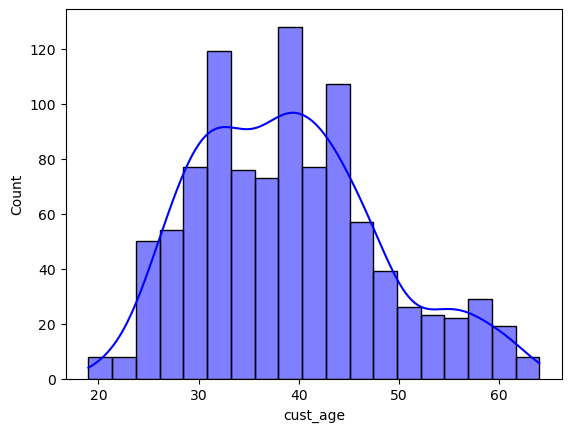

In [522]:
#Histograma para edad
sns.histplot(x='cust_age', data=df, color='blue',kde=True)
plt.show()

In [490]:
frecuencia_edad = df['cust_age'].value_counts().sort_values(ascending=False)
frecuencia_edad

cust_age
43    49
39    48
41    45
34    44
38    42
31    42
30    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
36    32
44    32
42    32
28    30
26    26
45    26
48    25
27    24
47    24
57    16
55    14
49    14
25    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
22     1
20     1
19     1
Name: count, dtype: int64

Vemos que la moda de edad es 43 años, y en el entorno de los 43 tambien hay muchas observaciones, eso explica la barra mas alta del histograma.

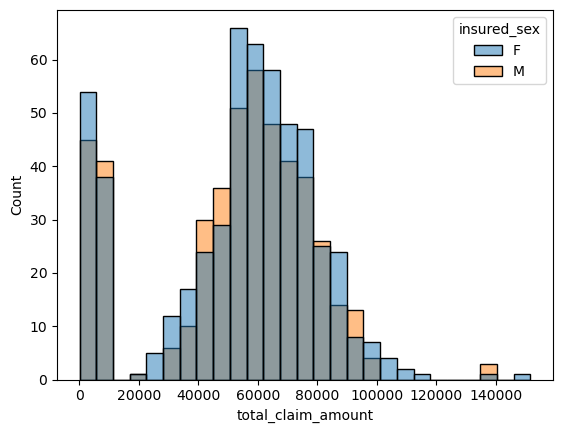

In [524]:
#Histograma para total_claim_amount segmentado por sexo del asegurado
sns.histplot(x='total_claim_amount', data=df, hue='insured_sex')
plt.show()

In [435]:
df['total_claim_amount'].max()

151632

Observamos en el gráfico que el reclamo más oneroso lo hizo una mujer (151.632 dólares).

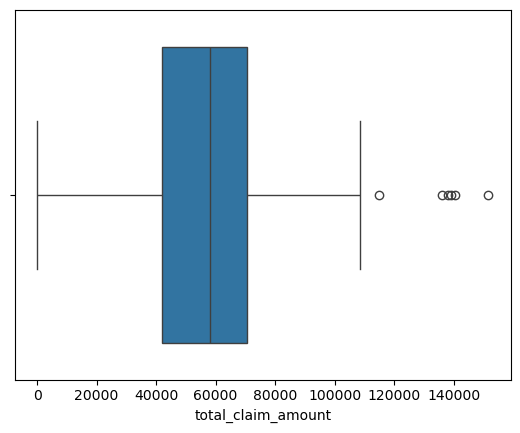

In [413]:
#Diagrama de caja para total_claim_amount
sns.boxplot(x="total_claim_amount", data=df)

Tenemos outliers a la derecha de la caja. 
Calculando estos outliers con el método IQR, llegamos a los siguientes resultados:

In [488]:
Q1_total_claim_amount = df['total_claim_amount'].quantile(0.25)
Q3_total_claim_amount = df['total_claim_amount'].quantile(0.75)
IQR_total_claim_amount = Q3_total_claim_amount - Q1_total_claim_amount

outliers_total_claim_amount = df[(df['total_claim_amount'] < (Q1_total_claim_amount - 1.5 * IQR_total_claim_amount)) | (df['total_claim_amount'] > (Q3_total_claim_amount + 1.5 * IQR_total_claim_amount))]

min_outlier_total_claim_amount=outliers_total_claim_amount['total_claim_amount'].min()
print(f"Outlier más chico: {min_outlier_total_claim_amount}")

max_outlier_total_claim_amount = outliers_total_claim_amount['total_claim_amount'].max()
print(f"Outlier más grande: {max_outlier_total_claim_amount}")


Outlier más chico: 114920
Outlier más grande: 151632


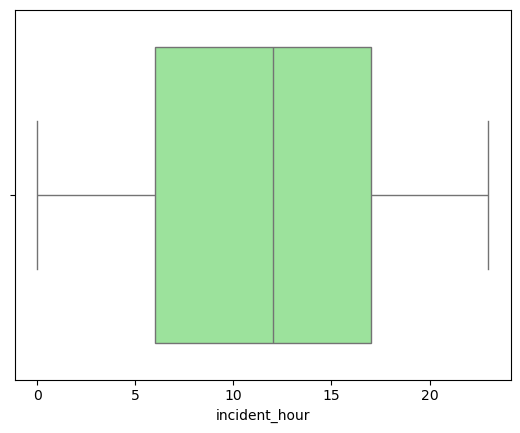

In [520]:
#Diagrama de caja para incident_hour
sns.boxplot(x="incident_hour", data=df,color='lightgreen')
plt.show()

Para esta variable no tenemos outliers ni a la izquierda ni a la derecha de la caja. Por otro lado observamos que la mayoría de los siniestros se dieron enntre las 6 y las 17 horas aproximadamente.

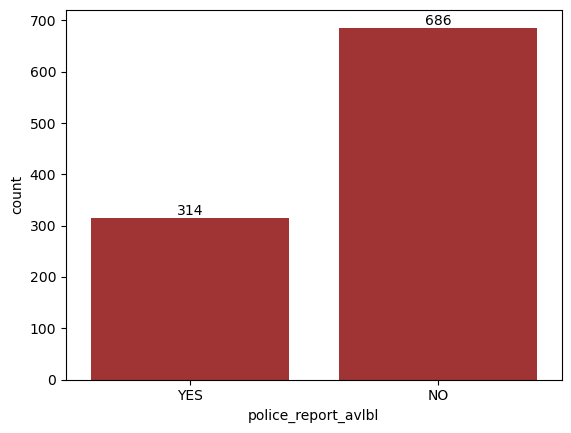

In [502]:
#Grafico de barras contando los casos que hubo reporte policial.
#Ya incorporamos los nulos a la categoria "No".
ax=sns.countplot(x="police_report_avlbl", data=df,color='firebrick')
for container in ax.containers:
    ax.bar_label(container)

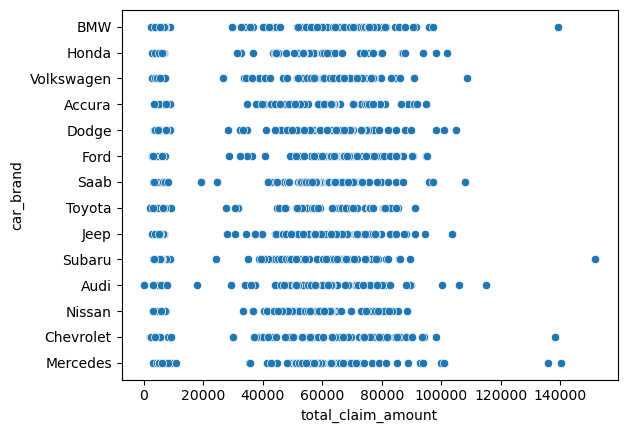

In [526]:
#Scatterplot entre total_claim_amount y car_brand
sns.scatterplot(x='total_claim_amount', y='car_brand', data=df)
plt.show()

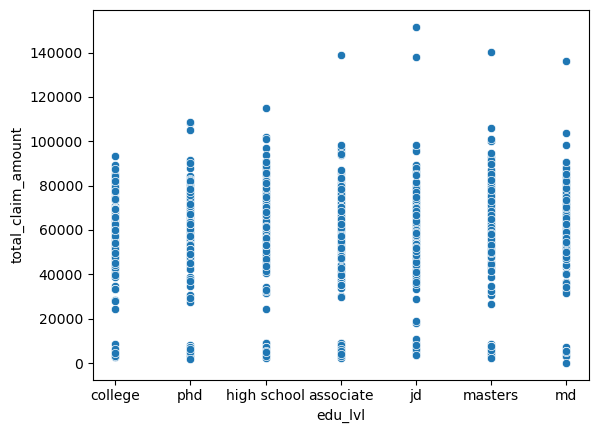

In [532]:
sns.scatterplot(x='edu_lvl',y='total_claim_amount',data=df)
plt.show()

Observamos que el reclamo mas oneroso lo hizo una persona con nivel educativo de Juris Doctor. También habíamos observado más arriba que este es el nivel educativo más frecuente en nuestro dataset.

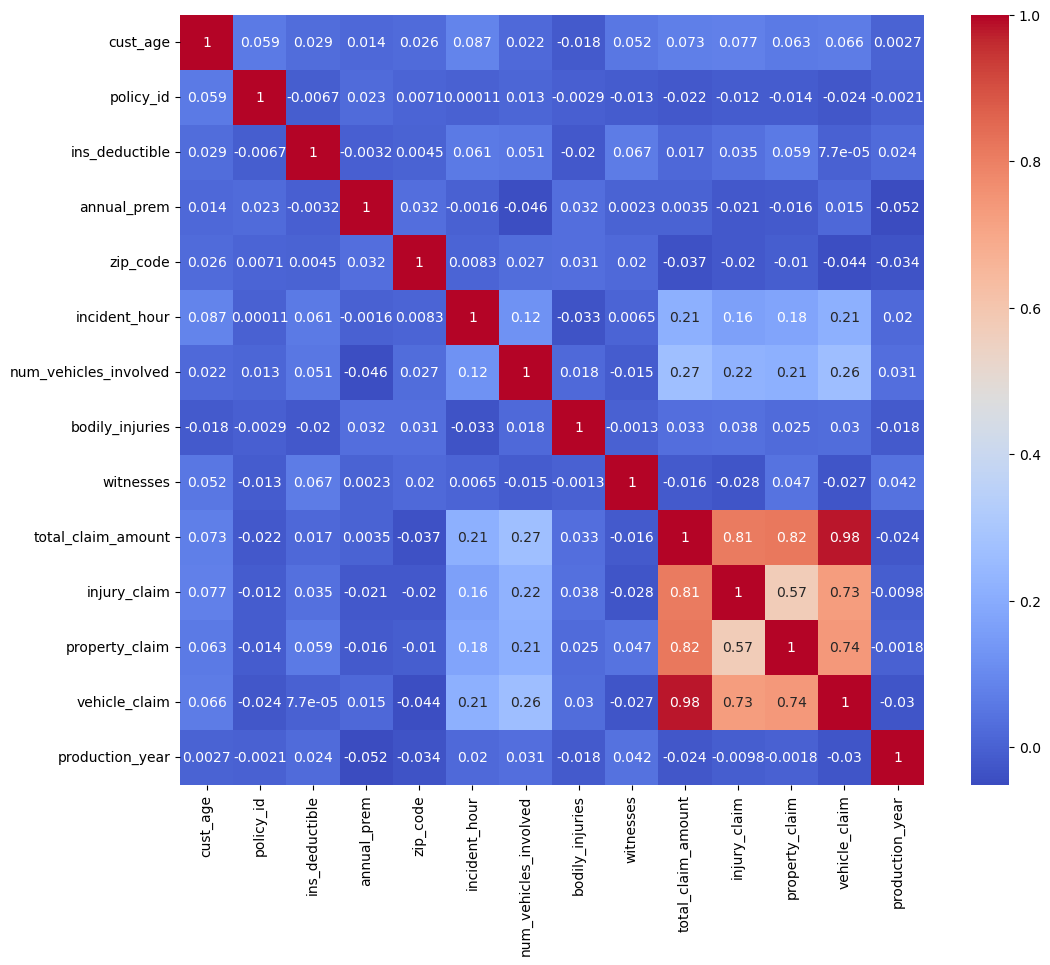

In [425]:
#Matriz de correlación
matriz_correlacion = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10)) 
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.show()

Vemos que la correlación más alta se da entre total_claim_amount y vehicle_claim, siendo 0.98; una correlación positiva, fuerte y casi perfecta. Esto implica que los montos del reclamo por daños al vehiculo estan estrechamente relacionados con los montos totales del reclamo y viceversa. Los montos totales del reclamo también se relacionan fuertemente con los montos del reclamo por daño a la propiedad y por lesiones corporales, pero en menor medida que el primero mencionado.

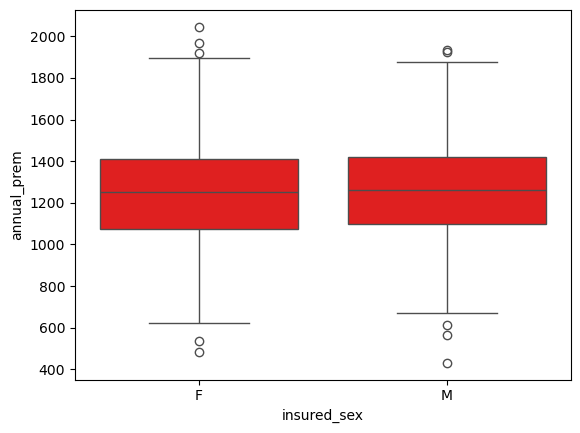

In [540]:
#Diagrama de caja de prima anual vs sexo del asegurado
sns.boxplot(x='insured_sex', y='annual_prem', data=df,color='red')
plt.show()

Vemos que la concentración del 50% de las observaciones de prima anual del seguro son muy parecidas entre hombres y mujeres, ya que las cajas se encuentran en posición muy similar; un poquito más arriba se encuentra la caja de los hombres. Por otro lado, vemos que el pago minimo de la prima lo realizó un hombre y el pago máximo una mujer (observando los outliers de ambos grupos).

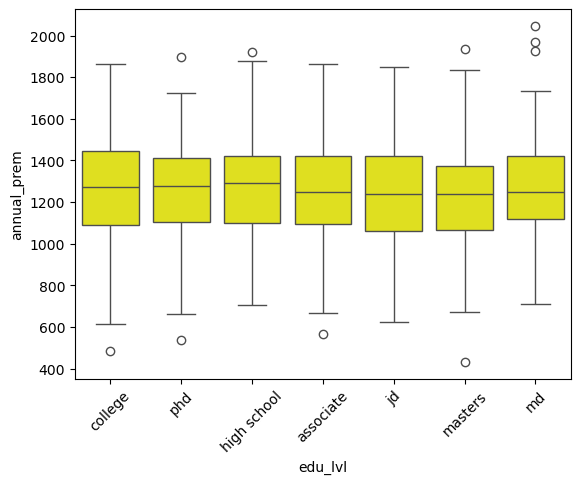

In [534]:
#Diagrama de caja de prima anual vs nivel educativo del asegurado
sns.boxplot(x='edu_lvl', y='annual_prem', data=df,color='yellow')
plt.xticks(rotation=45)
plt.show()

Observamos que los que tienen nivel educativo de MD (Doctor en medicina) son lo que tienen la observación máxima en cuanto a pago de la prima de seguro anual. En tanto los que tienen la observación mínima son los que tienen nivel de Masters (Maestría).